# Graphes partie III :  Applications à un graphe complexe

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from collections import deque
import pandas as pd
import json

# Introduction : étudier un graphe complexe

## Représentation et visualisation d'un graphe complexe

Le travail qui suit est basé sur les données disponibles à l'adresse suivante : http://evelinag.com/blog/2015/12-15-star-wars-social-network/index.html

Les graphes que nous allons étudier reposent sur l'étude des scripts (automatisée, heureusement !) des films *Star Wars* : en analysant les interactions entre les différents personnages (plus précisément les discussions auxquelles prennent par les personnages), on peut établir des graphes des interactions sociales.

Voici l'importation du fichier regroupant ces données, pour le meilleur des épisodes, bien évidemment l'épisode V, *L'empire contre-attaque* :

In [ ]:
with open('starwars-episode-5-interactions-allCharacters.json') as f:  
    data = json.load(f)
df=pd.DataFrame(data)

In [27]:
data

{'nodes': [{'name': 'R2-D2', 'value': 27, 'colour': '#bde0f6'},
  {'name': 'CHEWBACCA', 'value': 28, 'colour': '#A0522D'},
  {'name': 'JERJERROD', 'value': 4, 'colour': '#808080'},
  {'name': 'DARTH VADER', 'value': 13, 'colour': '#000000'},
  {'name': 'C-3PO', 'value': 33, 'colour': '#FFD700'},
  {'name': 'BIB FORTUNA', 'value': 4, 'colour': '#808080'},
  {'name': 'JABBA', 'value': 5, 'colour': '#808080'},
  {'name': 'LUKE', 'value': 31, 'colour': '#3881e5'},
  {'name': 'BOUSHH', 'value': 4, 'colour': '#808080'},
  {'name': 'HAN', 'value': 33, 'colour': '#ff9400'},
  {'name': 'LEIA', 'value': 22, 'colour': '#DCDCDC'},
  {'name': 'LANDO', 'value': 21, 'colour': '#808080'},
  {'name': 'EMPEROR', 'value': 11, 'colour': '#191970'},
  {'name': 'YODA', 'value': 3, 'colour': '#9ACD32'},
  {'name': 'OBI-WAN', 'value': 3, 'colour': '#48D1CC'},
  {'name': 'MON MOTHMA', 'value': 3, 'colour': '#808080'},
  {'name': 'ADMIRAL ACKBAR', 'value': 10, 'colour': '#808080'},
  {'name': 'PIETT', 'value': 

Ici chaque nœud ou sommet représente un personnage du film. Deux personnages sont reliés par une arête s'ils parlent dans une même scène (sauf pour Chewbacca et R2-D2, pour lesquels la seule présence suffit !). Plus ces personnages ont de scènes de dialogues communes, plus la valeur de l'arête est importante. Une valeur est aussi attribuée à chaque personnage, il s'agit simplement du nombre de scène dans lequel il apparaît.

Voici par exemple, issu des scripts, les *apparitions* de quelques personnages dans les différents épisodes : 
![](im/sw.png)   

Pour les plus ambitieux, on peut aussi travailler avec les données pour l'ensemble des 7 premiers épisodes :

In [ ]:
with open('starwars-full-interactions-allCharacters.json') as f:  
    data = json.load(f)
df=pd.DataFrame(data)

Un premier objectif est de représenter le graphe d'interactions sociale : pour cela, commençons par définir les structures de données qui nos serons utiles pour la suite.

In [47]:
# Nombre de personnages :
nb_perso = len(data['nodes']) 

# Nombre d'arêtes :        
nb_ar = len(data['links'])

# Liste des personnages : associe à son numéro le nom de personnage correspondant
Liste_perso = [] 

# Dictionnaire des persos : associe à un nom de personnage son numéro
Dict_perso = {} 

# Liste des couleurs associées à chaque perso (classés par numéros)
Color = [] 

# Dictionnaire des couleurs : associe à un nom de personnage sa couleur
Dict_color ={}

# Liste des tailles associées à chaque perso (classés par numéros)
Size = [] 

# Dictionnaire des tailles : associe à un nom de personnage sa taille
Dict_size = {}

# Dictionnaire des labels : contient, pour les personnages "importants"
# (non importants : de couleur grise) le nom du perso associé au même nom !
Labels = {} 

# Liste des poids associé à chaque arrête (classés par numéros) :
Wheight = []

Pour les nœuds :

In [48]:
for node in data['nodes']:
    Color.append(node['colour'])
    Size.append(node['value']*4) # facteur 4 pour lisibilité
    Liste_perso.append(node['name'])
    if node['colour'] != '#808080' : # Si le perso n'est pas en gris, il doit être important, on lui donne un label
        Labels[node['name']] = node['name']
        
for i in range(len(Liste_perso)) :
    Dict_color[Liste_perso[i]] = Color[i]
    Dict_size[Liste_perso[i]] = Size[i]
    Dict_perso[Liste_perso[i]] = i

Créons alors le graphe grâce au module `NetworkX` :

In [49]:
# Création du graphe
graphe = nx.Graph()

# Ajout des sommets :
for node in data['nodes']:
    graphe.add_node(node['name'])
    
# Ajout des arêtes :
for link in data['links'] :
    perso1 = Liste_perso[link['source']]
    perso2 = Liste_perso[link['target']]
    weight = link['value']
    Wheight.append(weight)
    graphe.add_edge(perso1, perso2, value = 1 / weight, weight = weight)

Et représentons-le :

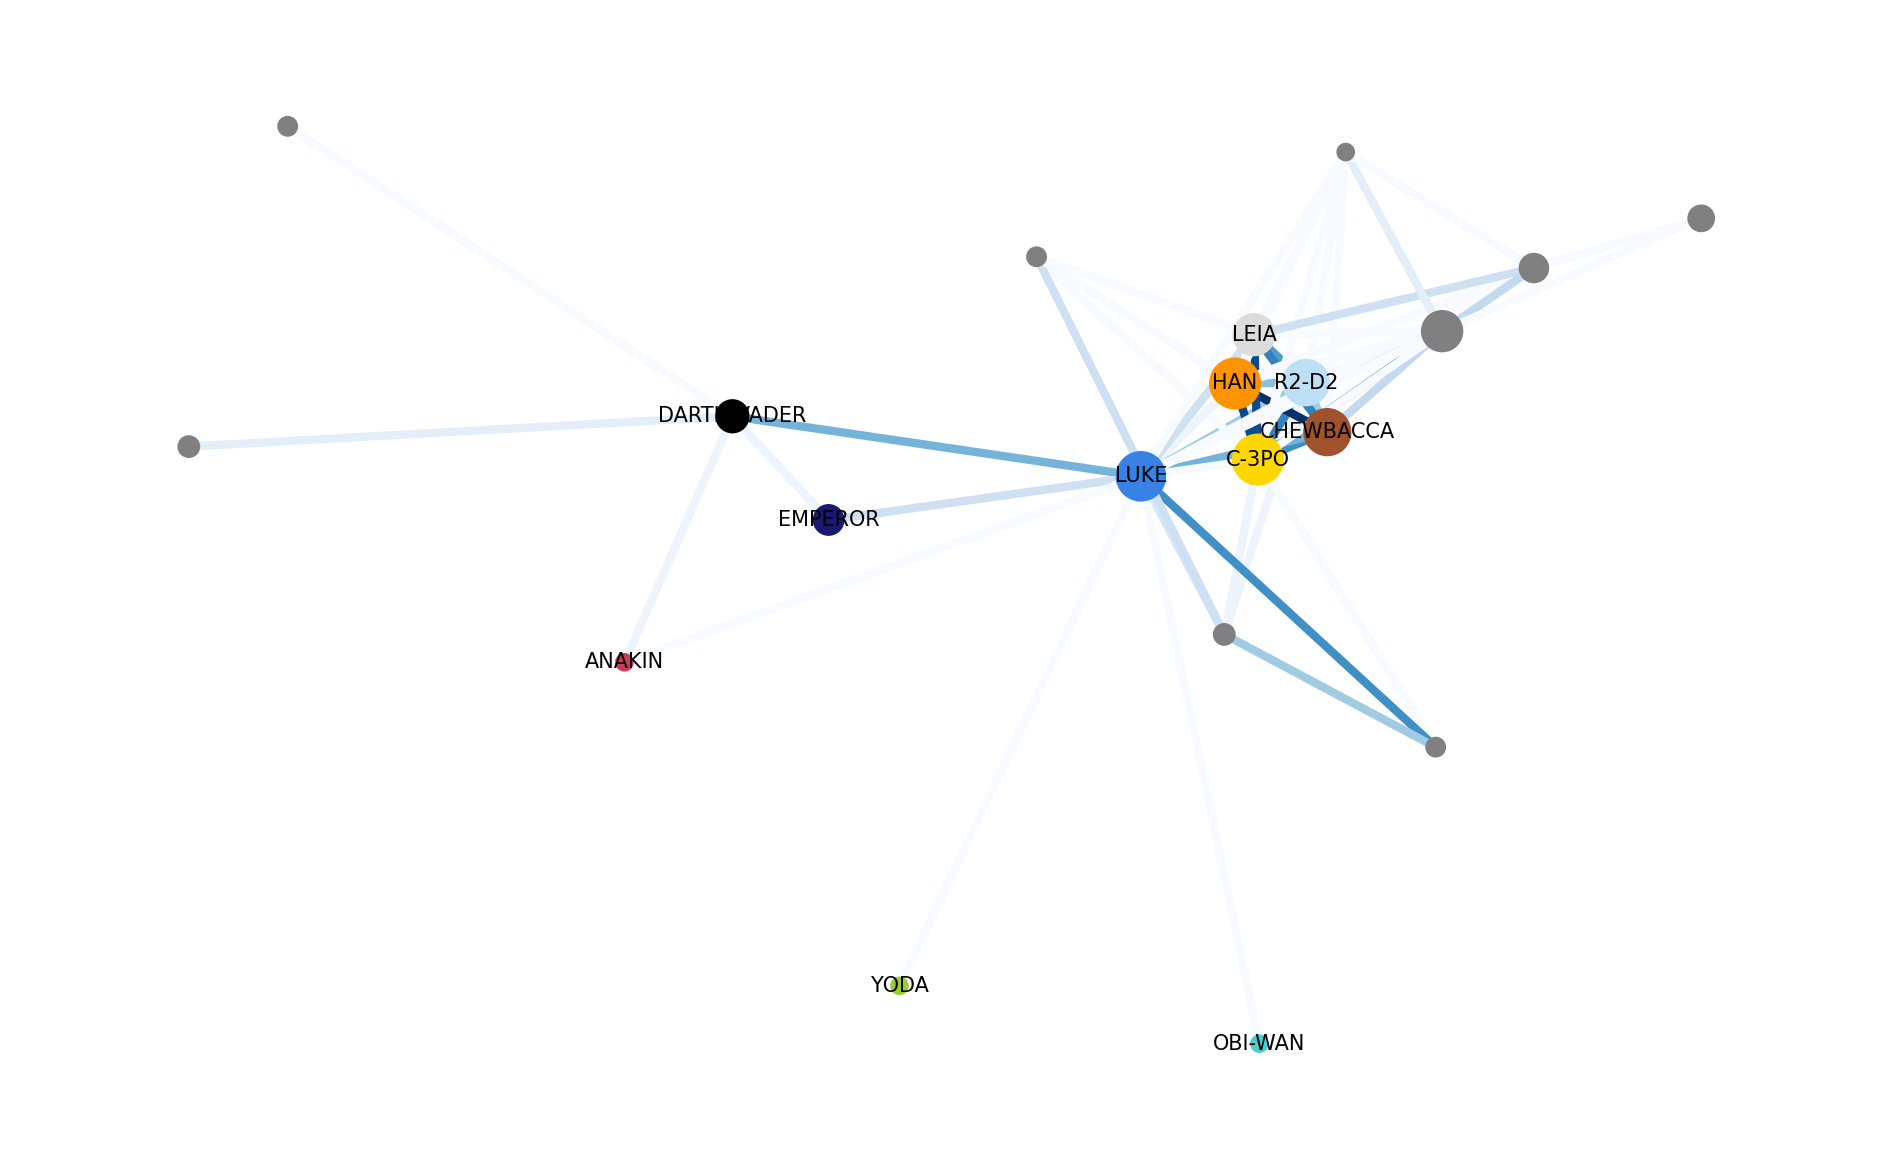

In [41]:
# Représentation graphique à l'aide de Matplotlib :
ratio = 0.8 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 300)

cmap = plt.cm.Blues
pos = nx.spring_layout(graphe, seed = 0)  # positions for all nodes
nx.draw_networkx_nodes(graphe, pos, node_color = Color, node_size = Size)
nx.draw_networkx_edges(graphe, pos, edge_color = Wheight, edge_cmap=cmap, width=2)
nx.draw_networkx_labels(graphe, pos, Labels, font_size=5, font_color="black")
plt.tight_layout()
plt.axis("off")
plt.show()

Sur le graphe ci-dessus, la taille de chaque personnage dépend du nombre de scène dans lequel il apparaît. L'intensité de la couleur des arêtes dépend du nombre de dialogues partagés.

Avec le module `Pyvis`, on peut obtenir une représentation plus *dynamique* :

In [42]:
net = Network(notebook = True)
net.from_nx(graphe)

for edge in net.edges :
    edge["color"] = 'lightgrey'

for node in net.nodes :
    perso = node['id']
    node["color"] = Dict_color[perso]
    node["value"] = Dict_size[perso]
    
display(net.show("graphe_sw.html"))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Pagerank

A partir de ce graphe *social*, on peut déterminer l'indice *pagerank* de chaque personnage : en simplifiant, il s'agit de quantifier la *renommée* d'un personnage (selon un algorithme qui a fait le succès de *Google*) à partir du nombre d'autres personnages dialoguant avec lui. Pour détemriner cet indice, on utilise simplement la fonction dédiée dans le module `NetworkX` :

In [43]:
pr = nx.pagerank(graphe)
pr

{'R2-D2': 0.06264059712308684,
 'CHEWBACCA': 0.055066054106916104,
 'JERJERROD': 0.019856654390356616,
 'DARTH VADER': 0.07269021205340688,
 'C-3PO': 0.0854188905116645,
 'BIB FORTUNA': 0.0295097365774573,
 'JABBA': 0.0443736840369331,
 'LUKE': 0.13880683222162712,
 'BOUSHH': 0.03478054909814104,
 'HAN': 0.0695465482186512,
 'LEIA': 0.0695465482186512,
 'LANDO': 0.07101762383357935,
 'EMPEROR': 0.027722357115509327,
 'YODA': 0.015365702725152712,
 'OBI-WAN': 0.015365702725152712,
 'MON MOTHMA': 0.06212339359339941,
 'ADMIRAL ACKBAR': 0.05741135455580205,
 'PIETT': 0.019856654390356616,
 'WEDGE': 0.0211785473886466,
 'ANAKIN': 0.027722357115509327}

Nous alors représenter au nouveau le graphe, mais en considérant, pour la taille des personnages, cette indice de renommée (plutôt que le nombre de scène dans lesquelles il apparaît) :

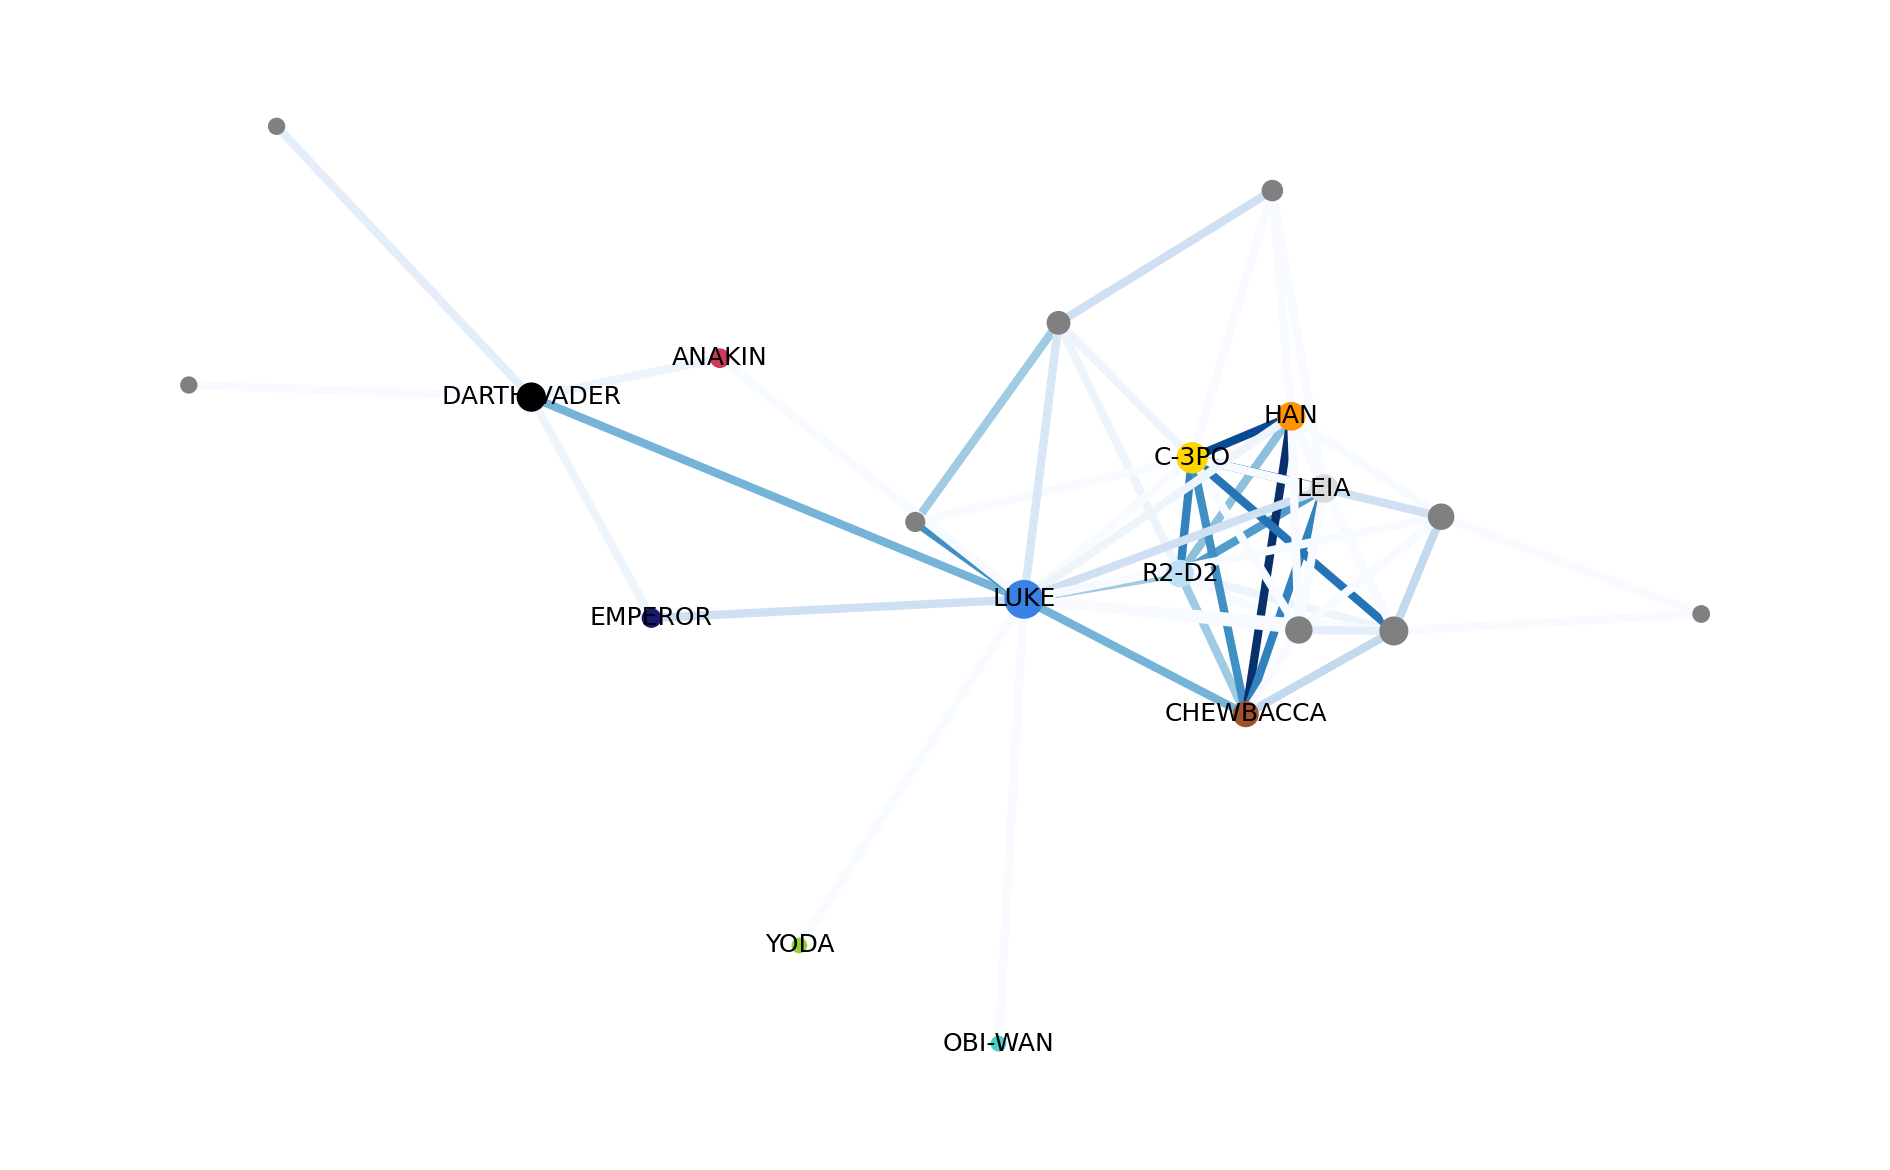

In [44]:
Pr = [pr[perso]*500 for perso in pr]

ratio = 0.8 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 300)

cmap = plt.cm.Blues
pos = nx.spring_layout(graphe, seed = 0)  # positions for all nodes
nx.draw_networkx_nodes(graphe, pos, node_color = Color, node_size = Pr)
nx.draw_networkx_edges(graphe, pos, edge_color = Wheight, edge_cmap=cmap, width=2)
nx.draw_networkx_labels(graphe, pos, Labels, font_size=6, font_color="black")
plt.tight_layout()
plt.axis("off")
plt.show()

In [45]:
net = Network(notebook = True)
net.from_nx(graphe)

for edge in net.edges :
    edge["color"] = 'lightgrey'

for node in net.nodes :
    perso = node['id']
    node["color"] = Dict_color[perso]
    node["value"] = pr[perso]
    
display(net.show("graphe_sw.html"))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Pour comparaison, voici le résultat avec les 7 premiers films :
    
![](im/SW_full_pr.png)   

Et on se rend compte que Star Wars est avant tout l'histoire d'Anakin Skywalker, Obi-Wan Kenobi et C-3PO ... 

# Au travail  : étude de la connexité !

On fournit le code ci-dessous permettant de définir le dictionnaire d'adjacence correspondant au graphe étudié (on ne tient pas compte du poids des arêtes) : 

In [50]:
Dict_SW = {}

for perso in Liste_perso :
    Dict_SW[perso] = []

for edge in data['links'] :
    perso1 = Liste_perso[edge['source']]
    perso2 = Liste_perso[edge['target']]
    Dict_SW[perso1].append(perso2)
    Dict_SW[perso2].append(perso1)

On fournit aussi les fonctions utiles suivantes :


In [51]:
def creer_pile():
    return deque()
def empiler(P,v):
    P.append(v)  
def depiler(P):
    if len(P)==0:
        raise ValueError("Erreur : pile vide") 
    else :
        P.pop()
    return(P)
def taille(P):
    return len(P)
def est_vide(P):
    return len(P)==0
def sommet(P):
    if est_vide(P)==1:
        raise ValueError("Erreur : pile vide")
    else :
        return P[-1]
def creer_file():
    return deque()
def defiler(F):
    """ Enlève la fin de la file F, soit son dernier élément, celui tout à droite """
    if len(F)==0:
        raise ValueError("Erreur : file vide")
    else :
        F.pop()
    return(F)
def enfiler(F,v):
    """ Ajoute l'élément v au début de la file F, v devient le premier élément, celui tout à gauche """
    F.appendleft(v)
def taille(F):
    return len(F)
def est_vide(F):
    return len(F)==0
def fin(F):
    """ Retourne la fin de la file F, soit son dernier élément, celui tout à droite """
    if est_vide(F)==1:
        raise ValueError("Erreur : file vide")
    else :
        return F[-1]
    
def DFS(Graphe, sommet_dep):
    """ Retourne la liste des sommets du graphe Graphe parcouru lors d'un parcours en profondeur, en partant du sommet sommet_dep"""
    
    sommet_vis = sommet_dep # Sommet actuellement visité
    Visités = [sommet_vis] # Liste des sommets déjà visités
    
    A_visiter = creer_pile() # Pile des sommets à visiter
    for sommet_adj in Graphe[sommet_vis] : # Les sommets à visiter sont les sommets adjacents au sommet actuellement visité
        empiler(A_visiter, sommet_adj)
    
    while est_vide(A_visiter) == False :    
        
        # On considère un sommet de la pile encore non visité :
        if sommet(A_visiter) in Visités :
            depiler(A_visiter)
        else :
            sommet_vis = sommet(A_visiter) # sommet visité

            # On indique qu'on l'a visité et qu'il n'est plus à visiter :
            depiler(A_visiter)
            Visités.append(sommet_vis)

            # On met à jour la pile des sommets à visiter, à partir des voisins :
            for sommet_adj in Graphe[sommet_vis] :
                if sommet_adj not in Visités :
                    empiler(A_visiter, sommet_adj)

    return Visités    

**Question 1 :** Vérifier que le graphe est connexe. Pour rappel, un graphe **connexe** est un graphe dans lequel chaque sommet peut être relié à tout autre sommet par une arête ou une suite d'arêtes : on peut dire qu'un graphe connexe est *d'un seul tenant*.

*Aide : il est pertinent de partir d'un algorithme de parcours du graphe !*

Correction : Comme le graphe est non orienté, on peut aisément se convaincre qu'il est connexe si et seulement si, à partir d'un sommet quelconque, on obtient, via un parcours (quelconque, en profondeur ou en largeur), la totalité des sommets du graphe. Essayons ici avec le graphe le plus complexe, celui des 7 premiers épisodes.

In [53]:
from random import randint

perso_dep = Liste_perso[randint(0, nb_perso - 1)]

print("Graphe connexe : ", nb_perso == len(DFS(Dict_SW, perso_dep)))

Graphe connexe :  False


Le graphe est non connexe, car il existe un personnage esseulé : Gold Five (pilote dans l'épisode 4, lors de la bataille de Yavin). Comme celui-ci n'apparaît que seul dans son vaisseau, il n'interagit pas avec les autres personnages, même s'il leur parle via radio... Enlevons ce personnage, et voyons si le graphe devient bien connexe :

In [ ]:
Dict_SW.pop("GOLD FIVE")

In [66]:
nb_perso -= 1
print("Graphe connexe : ", nb_perso == len(DFS(Dict_SW, perso_dep)))

Graphe connexe :  True


D'après Wikipédia : *Dans la théorie des graphes, une clique est un ensemble de sommets deux-à-deux adjacents. Un graphe complet est un graphe dont l'ensemble des sommets est une clique : chaque sommet est relié directement à tous les autres sommets.*

**Question 2 :** Le graphe étudié est-il complet ? Ecrire une fonction permettant de déterminer les cliques possible d'un graphe. Quel pourrait être l'intérêt d'une telle recherche dans le graphe des interactions sociale dans *Star Wars* ?

Les graphes étudiés ne sont pas complet, en effet, par exemple, Obi-Wan n'a pas d'interactions avec l'empereur (en tout cas sous ce nom là...) :

In [68]:
print("OBI WAN" in Dict_SW["EMPEROR"])

False


Ecrivons la fonction demandée, selon l'algorithme *Bron-Kerbosch* :

In [89]:
def cliques(Clique, Candidats, Exclus, Graphe) :
    
    if Candidats == [] and Exclus == [] :
        print(Clique)
        return Clique
    
    Copy_Cand = Candidats.copy()
    for sommet in Copy_Cand : # Candidats est modifiée, on itère sur la copie

        Clique_new = Clique + [sommet]
        Voisins = Graphe[sommet]
        Exclus_new = [ ex for ex in Exclus if ex in Voisins ]
        Candidats_new = [ cd for cd in Candidats if cd in Voisins ]
        
        cliques(Clique_new, Candidats_new, Exclus_new, Graphe)
        
        Exclus.append(sommet)
        Candidats.remove(sommet)    

In [90]:
Candidats_i = [sommet for sommet in Dict_SW]
cliques([], Candidats_i, [], Dict_SW)

['R2-D2', 'CHEWBACCA', 'BB-8', 'C-3PO', 'LEIA', 'HAN']
['R2-D2', 'CHEWBACCA', 'OBI-WAN', 'C-3PO', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN']
['R2-D2', 'CHEWBACCA', 'C-3PO', 'JABBA', 'LUKE', 'HAN']
['R2-D2', 'CHEWBACCA', 'C-3PO', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN', 'LANDO']
['R2-D2', 'QUI-GON', 'OBI-WAN', 'EMPEROR', 'PADME', 'ANAKIN', 'C-3PO', 'YODA', 'BAIL ORGANA']
['R2-D2', 'QUI-GON', 'PADME', 'WATTO', 'ANAKIN', 'C-3PO', 'KITSTER']
['R2-D2', 'QUI-GON', 'PADME', 'ANAKIN', 'C-3PO', 'JABBA']
['R2-D2', 'OBI-WAN', 'EMPEROR', 'ANAKIN', 'C-3PO', 'YODA', 'LUKE']
['R2-D2', 'OBI-WAN', 'EMPEROR', 'ANAKIN', 'C-3PO', 'DARTH VADER', 'LUKE']
['R2-D2', 'OBI-WAN', 'PADME', 'ANAKIN', 'C-3PO', 'CAPTAIN TYPHO']
['R2-D2', 'PADME', 'ANAKIN', 'C-3PO', 'OWEN', 'BERU']
['R2-D2', 'ANAKIN', 'C-3PO', 'JABBA', 'LUKE']
['R2-D2', 'ANAKIN', 'C-3PO', 'OWEN', 'BERU', 'LUKE']
['R2-D2', 'C-3PO', 'BAIL ORGANA', 'CAPTAIN ANTILLES']
['R2-D2', 'C-3PO', 'BERU', 'LUKE', 'LEIA']
['R2-D2', 'C-3PO', 'LUKE', 'BIGGS', 'LEIA']
['CHEWB

Cette fonction affiche toutes les cliques possibles. Pour stocker ces résultats, il semble nécessaire d'utiliser la fonction `yield` de python :

In [100]:
def cliques(Clique, Candidats, Exclus, Graphe) :
    
    if Candidats == [] and Exclus == [] :
        print(Clique)
        yield Clique
    
    Copy_Cand = Candidats.copy()
    for sommet in Copy_Cand : # Candidats va être modifiée, on itère sur une copie
        Clique_new = Clique + [sommet]
        Voisins = Graphe[sommet]
        Exclus_new = [ ex for ex in Exclus if ex in Voisins ]
        Candidats_new = [ cd for cd in Candidats if cd in Voisins ]
        
        for clique in cliques(Clique_new, Candidats_new, Exclus_new, Graphe) :
            print(clique)
            yield clique
        
        Exclus.append(sommet)
        Candidats.remove(sommet)

In [ ]:
Candidats_i = [sommet for sommet in Dict_SW]
Cliques = list(cliques([], Candidats_i, [], Dict_SW))

Intéressons nous à la plus grande clique contenant le "gentils", Luke Skywalker :

In [112]:
l = 0
Clique_max_L = []
for clique in Cliques :
    if "LUKE" in clique and len(clique) >  l :
        l = len(clique)
        Clique_max_L = clique

print(Clique_max_L)

['R2-D2', 'CHEWBACCA', 'OBI-WAN', 'C-3PO', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN']


In [117]:
l = 0
Clique_max_DV = []
for clique in Cliques :
    if "DARTH VADER" in clique and len(clique) >  l :
        l = len(clique)
        Clique_max_DV = clique

print(Clique_max_DV)

['R2-D2', 'CHEWBACCA', 'OBI-WAN', 'C-3PO', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN']


In [114]:
l = 0
Clique_max_Robots = []
for clique in Cliques :
    if "R2-D2" in clique and "C-3PO" in clique and len(clique) >  l :
        l = len(clique)
        Clique_max_Robots = clique

print(Clique_max_Robots)

['R2-D2', 'QUI-GON', 'OBI-WAN', 'EMPEROR', 'PADME', 'ANAKIN', 'C-3PO', 'YODA', 'BAIL ORGANA']


In [118]:
l = 0
Clique_max_Y = []
for clique in Cliques :
    if "YODA" in clique and len(clique) >  l :
        l = len(clique)
        Clique_max_Y = clique

print(Clique_max_Y)

['R2-D2', 'QUI-GON', 'OBI-WAN', 'EMPEROR', 'PADME', 'ANAKIN', 'C-3PO', 'YODA', 'BAIL ORGANA']
